<a href="https://colab.research.google.com/github/deepakpracheta/Hotel_Booking_Analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

This our first capstone project. We chose this project because out of the given project list this by name we fe

# **Importing Libraries**


In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
%matplotlib inline

In [2]:
from google.colab import drive                    # Mounting drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
hotel_df = pd.read_csv("/content/drive/MyDrive/Capstone Projects/EDA Project/Hotel Bookings.csv")  

In [ ]:
hotel_df.head().T

,0,1,2,3,4
hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel,Resort Hotel
is_canceled,0,0,0,0,0
lead_time,342,737,7,13,14
arrival_date_year,2015,2015,2015,2015,2015
arrival_date_month,July,July,July,July,July
arrival_date_week_number,27,27,27,27,27
arrival_date_day_of_month,1,1,1,1,1
stays_in_weekend_nights,0,0,0,0,0
stays_in_week_nights,0,0,1,1,2
adults,2,2,1,1,2


In [4]:
hotel_df.shape

(119390, 32)

In [ ]:
hotel_df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,...,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,...,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,...,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,...,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,...,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,...,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,...,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,...,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [ ]:
hotel_df.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [ ]:
hotel_df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [ ]:
hotel_df.isnull().sum()/hotel.shape[0]*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

As seen from data there are four columns namely Children, Country, Agent, Company. But out of these four company has above 94% of missing data. It does not have the validity of the information , so deleting it.

In [5]:
# Before deletion making a copy of our dataset
hotel = hotel_df.copy()

In [6]:
hotel.drop('company',axis=1,inplace=True)

There is some duplicate data also where all columns for booking are same. So removing such duolicate rows.

In [7]:
hotel.duplicated().value_counts()

False    87389
True     32001
dtype: int64

In [8]:
hotel.drop_duplicates(inplace=True)

In [9]:
hotel.shape

(87389, 31)

There are some bookings with 0 guests means 0 adults,0 babies,0 children. So removing such bookings. 

In [10]:
hotel.drop(hotel.loc[(hotel["adults"] + hotel["children"] + hotel["babies"] == 0)].index, inplace=True)

In [11]:
hotel.shape

(87223, 31)

There are some hotels with adr negative. How can a hotel can have average daily rate(adr). So changing it to 0.

In [12]:
hotel["adr"].iloc[hotel["adr"]<0]=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [13]:
hotel['children'].fillna(0,inplace=True)

In [14]:
hotel['agent'].fillna(0,inplace=True)

In [15]:
hotel.drop(hotel.loc[(hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights'] == 0)].index, inplace=True)

In [16]:
hotel.drop(hotel.loc[hotel['adr']==5400].index, inplace=True)

In [17]:
hotel.drop(hotel.loc[hotel['market_segment']=='Undefined'].index, inplace=True)


# Data Cleaning done

In [18]:
hotel.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,86629.0,0.276847,0.447443,0.0,0.0,0.0,1.00,1.0
lead_time,86629.0,80.301343,86.075137,0.0,12.0,50.0,126.00,709.0
arrival_date_year,86629.0,2016.212285,0.685960,2015.0,2016.0,2016.0,2017.00,2017.0
arrival_date_week_number,86629.0,26.821688,13.652321,1.0,16.0,27.0,37.00,53.0
arrival_date_day_of_month,86629.0,15.818006,8.835887,1.0,8.0,16.0,23.00,31.0
stays_in_weekend_nights,86629.0,1.011543,1.027558,0.0,0.0,1.0,2.00,19.0
stays_in_week_nights,86629.0,2.642037,2.035203,0.0,1.0,2.0,4.00,50.0
adults,86629.0,1.880537,0.622257,0.0,2.0,2.0,2.00,55.0
children,86629.0,0.139318,0.456917,0.0,0.0,0.0,0.00,10.0
babies,86629.0,0.010862,0.113846,0.0,0.0,0.0,0.00,10.0


 1. Which Hotel type has the highest ADR?

In [ ]:
# Grouping by Hotel ADR
group_by_hotel=hotel.groupby('hotel')
highest_adr=group_by_hotel['adr'].sum().reset_index()
highest_adr

,hotel,adr
0,City Hotel,8332065
1,Resort Hotel,3795760


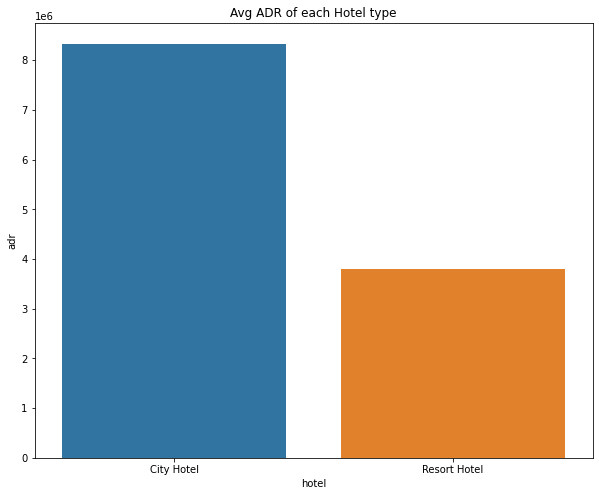

In [ ]:
# setting plot size
plt.figure(figsize=(10,8))

# Setting Labels
plt.xlabel('Hotel Type')
plt.ylabel('ADR')
plt.title("Avg ADR of each Hotel type")

# Plotting the Graph
sns.barplot(x='hotel',y='adr', data=highest_adr)

Observation:
Here through chart we can conclude that City Hotel generates more revenue as compared to Resort Hotels.

In [19]:
# calculating average ADR monthwise.
# Create list of months 
month_index = ['January','February','March','April','May','June','July','August','September','October','November','December']
adr_month=round(hotel.groupby('arrival_date_month')['adr'].mean().reindex(month_index),2)
adr_month

arrival_date_month
January       70.88
February      75.53
March         81.68
April        104.10
May          111.95
June         120.41
July         136.46
August       151.73
September    112.60
October       91.36
November      73.83
December      82.84
Name: adr, dtype: float64

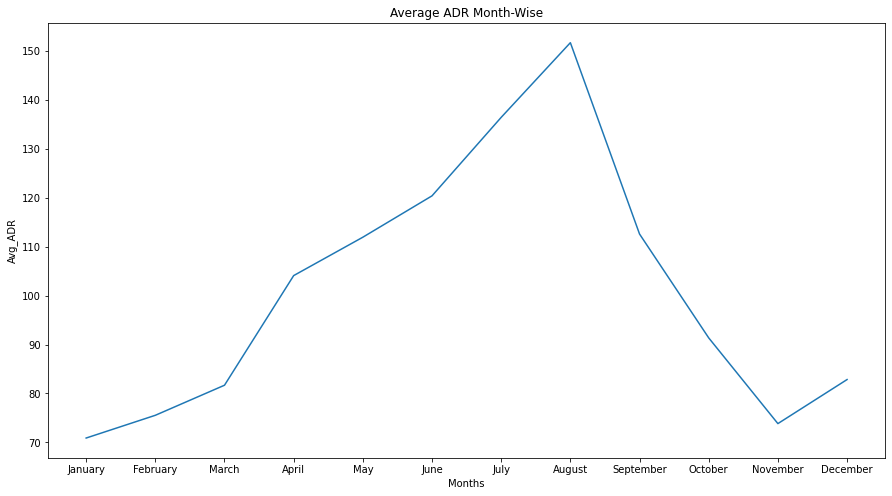

In [20]:
# x_axis values 
x_axis_data = adr_month.index

# y_axis values
y_axis_data = adr_month.values

plt.figure(figsize=(15,8))
plt.plot(x_axis_data,y_axis_data)

plt.xlabel('Months')
plt.ylabel('Avg_ADR')
plt.title('Average ADR Month-Wise')
plt.show()

In [22]:
# Calculating No.of booking Monthwise.

# Confirmed Bookings
confirmed = hotel[hotel['is_canceled']==0]

# arranging hotel bookings according to month index
booking_by_month = confirmed['arrival_date_month'].value_counts().reindex(month_index)
booking_by_month.cloumns = ['Month','Bookings']
booking_by_month

January      3604
February     4624
March        5613
April        5467
May          5855
June         5370
July         6792
August       7572
September    5018
October      5201
November     3862
December     3668
Name: arrival_date_month, dtype: int64

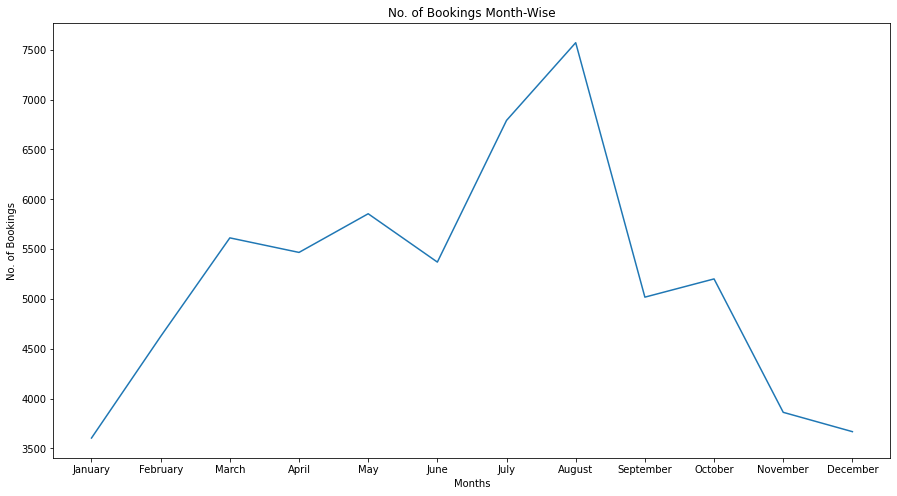

In [23]:
# x_axis values 
x_axis_data = booking_by_month.index

# y_axis values
y_axis_data = booking_by_month.values

plt.figure(figsize=(15,8))
plt.plot(x_axis_data,y_axis_data)

plt.xlabel('Months')
plt.ylabel('No. of Bookings')
plt.title('No. of Bookings Month-Wise')
plt.show()

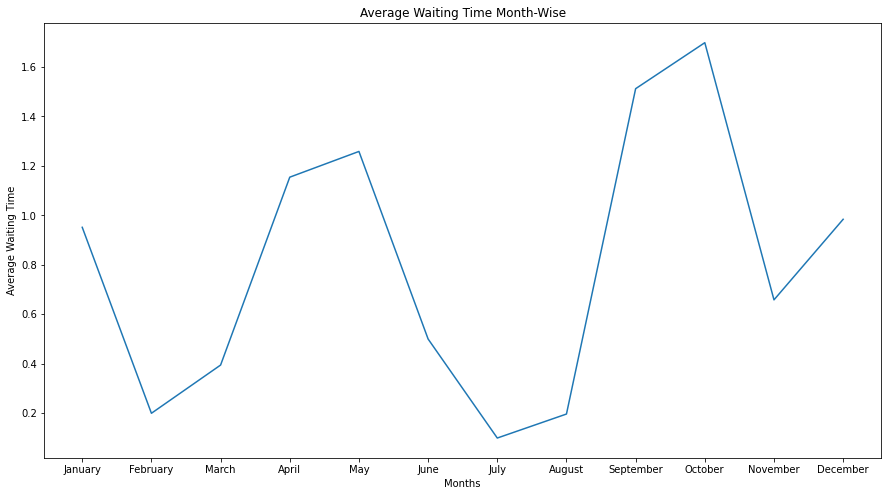

In [24]:
# Calculating Average wait_time monthly.
avg_wait = hotel.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)
avg_wait
# x_axis values 
x_axis_data = avg_wait.index

# y_axis values
y_axis_data = avg_wait.values

plt.figure(figsize=(15,8))
plt.plot(x_axis_data,y_axis_data)

plt.xlabel('Months')
plt.ylabel('Average Waiting Time')
plt.title('Average Waiting Time Month-Wise')
plt.show()

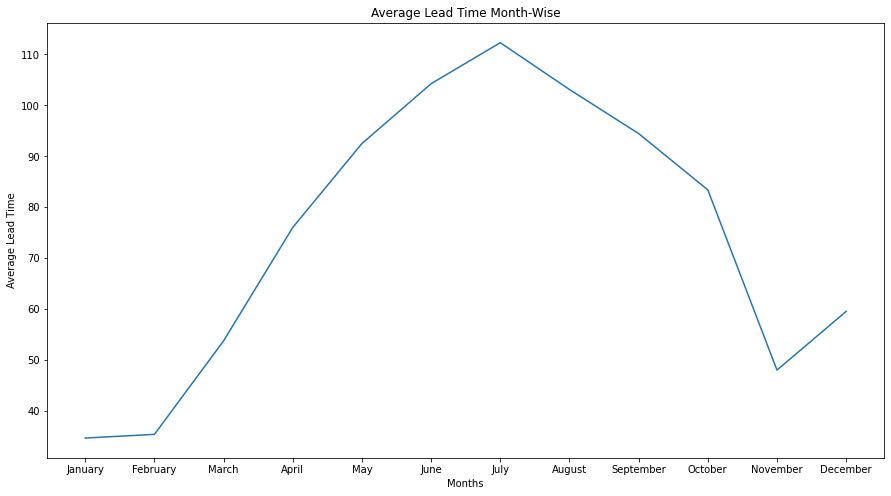

In [25]:
# Calculating Average lead_time monthly.
avg_lead = hotel.groupby('arrival_date_month')['lead_time'].mean().reindex(month_index)
avg_lead
# x_axis values 
x_axis_data = avg_lead.index

# y_axis values
y_axis_data = avg_lead.values

plt.figure(figsize=(15,8))
plt.plot(x_axis_data,y_axis_data)

plt.xlabel('Months')
plt.ylabel('Average Lead Time')
plt.title('Average Lead Time Month-Wise')
plt.show()

In [26]:
# What is the Optimal stay length in both types of hotels ?

In [28]:
hotel['total_stay'] = hotel['stays_in_weekend_nights'] + hotel['stays_in_week_nights']

In [31]:
stay=hotel.groupby(['total_stay','hotel']).agg("count").reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_stay,hotel,Number of stays
0,1,City Hotel,10266
1,1,Resort Hotel,6894
2,2,City Hotel,10812
3,2,Resort Hotel,4921
4,3,City Hotel,13542
...,...,...,...
66,46,Resort Hotel,1
67,48,City Hotel,1
68,56,Resort Hotel,2
69,60,Resort Hotel,1


Text(0.5, 0, 'total_stay(days)')

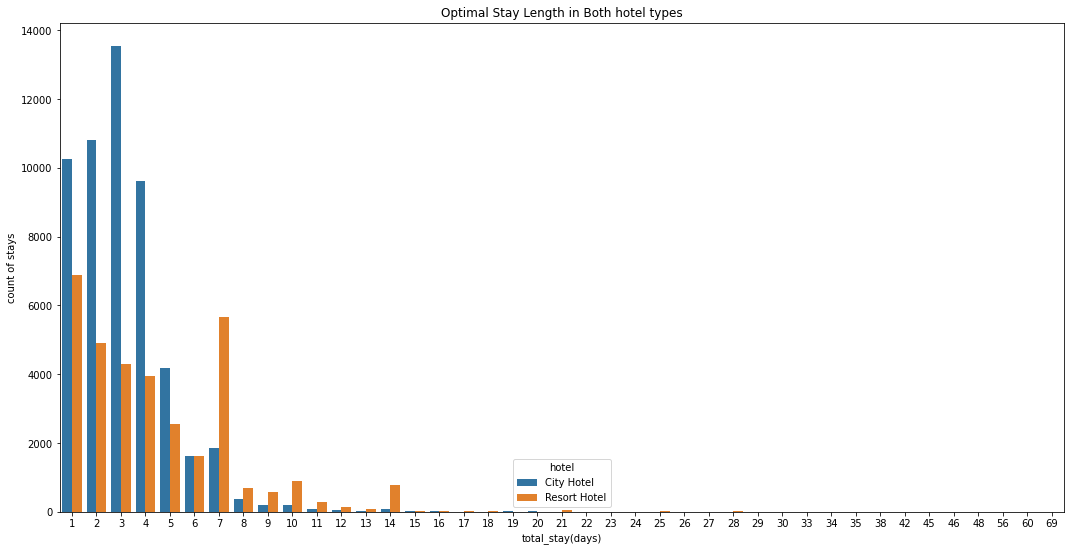

In [32]:
plt.figure(figsize = (18,9))
sns.barplot(x = 'total_stay', y = 'Number of stays',data= stay,hue='hotel')

#set labels
plt.title('Optimal Stay Length in Both hotel types')
plt.ylabel('count of stays')
plt.xlabel('total_stay(days)')

In [29]:
(hotel[hotel['total_stay']==1]).count()

hotel                             17160
is_canceled                       17160
lead_time                         17160
arrival_date_year                 17160
arrival_date_month                17160
arrival_date_week_number          17160
arrival_date_day_of_month         17160
stays_in_weekend_nights           17160
stays_in_week_nights              17160
adults                            17160
children                          17160
babies                            17160
meal                              17160
country                           16940
market_segment                    17160
distribution_channel              17160
is_repeated_guest                 17160
previous_cancellations            17160
previous_bookings_not_canceled    17160
reserved_room_type                17160
assigned_room_type                17160
booking_changes                   17160
deposit_type                      17160
agent                             17160
days_in_waiting_list              17160


In [ ]:
## Now We will look for Most common channel used for bookings.
# First we will check in City Hotel

In [ ]:
book= hotel.groupby(['hotel','market_segment']).sum().reset_index()

In [ ]:
type(book)

pandas.core.frame.DataFrame

In [ ]:
book_city_hotel = book.loc[book['hotel']=='City Hotel']

In [ ]:
book_city_hotel

,hotel,market_segment,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
0,City Hotel,Aviation,45,971,455721,5661,3524,245,566,229,...,0,63,13,101,57,3672.0,0,22738.68,6,27
1,City Hotel,Complementary,54,5732,1014065,14275,7405,152,601,752,...,18,203,156,1470,139,3647.0,35,1409.43,39,523
2,City Hotel,Corporate,263,40698,4471670,60557,35101,964,3198,2648,...,11,890,582,7573,749,31456.0,448,184138.88,268,812
3,City Hotel,Direct,912,273398,11165966,147402,87463,4288,11617,10198,...,115,180,103,288,2069,48205.0,65,671447.51,411,3185
4,City Hotel,Groups,887,350911,5279740,74587,43095,2052,4830,4196,...,3,23,270,62,1230,89688.0,23428,223301.30,4,511
5,City Hotel,Offline TA/TO,1257,702833,14594349,205300,115605,6633,16747,13193,...,59,108,177,273,1824,480335.0,30238,634369.98,48,2112
6,City Hotel,Online TA,12615,2769774,70424348,910940,547178,32051,83435,69025,...,186,190,604,439,6799,430318.0,129,4190209.08,1121,30727
7,City Hotel,Undefined,2,3,4030,64,8,1,2,5,...,0,0,0,0,0,0.0,0,30.00,0,3


In [ ]:
book_city_hotel.groupby('hotel')

In [ ]:
hotel['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
hotel[hotel['market_segment']=='Undefined'].sum()

hotel                                       City HotelCity Hotel
is_canceled                                                    2
lead_time                                                      3
arrival_date_year                                           4030
arrival_date_month                                  AugustAugust
arrival_date_week_number                                      64
arrival_date_day_of_month                                      8
stays_in_weekend_nights                                        1
stays_in_week_nights                                           2
adults                                                         5
children                                                     0.0
babies                                                         0
meal                                                        BBBB
country                                                   PRTPRT
market_segment                                UndefinedUndefined
distribution_channel     

In [ ]:
hotel.drop(hotel[hotel.market_segment== 'Undefined'],axis = 0, inplace=True)

In [ ]:
hotel.head()

""
0
1
2
3
4


In [ ]:
x = hotel[hotel['market_segment']=='Undefined']

In [ ]:
hotel.drop(x , inplace=True)

In [ ]:
df = hotel.groupby(['arrival_date_month'])

In [ ]:
hotel['days_in_waiting_list'].value_counts().sort_values(ascending = False)

0      115692
39        227
58        164
44        141
31        127
        ...  
74          1
81          1
73          1
167         1
36          1
Name: days_in_waiting_list, Length: 128, dtype: int64

In [ ]:
# Create list of months 
month_index = ['January','February','March','April','May','June','July','August','September','October','November','December']
# arranging hotel bookings according to month index
booking_by_month = hotel['arrival_date_month'].value_counts().reindex(month_index)
booking_by_month

January       5929
February      8068
March         9794
April        11089
May          11791
June         10939
July         12661
August       13877
September    10508
October      11160
November      6794
December      6780
Name: arrival_date_month, dtype: int64

In [ ]:
mean_waiting_time_booking = hotel.groupby('arrival_date_month')['days_in_waiting_list'].mean().reindex(month_index)
mean_waiting_time_booking

arrival_date_month
January      2.526396
February     0.764874
March        1.376965
April        3.012445
May          4.339072
June         1.955115
July         0.229919
August       0.398717
September    4.221926
October      4.598835
November     1.767736
December     3.007522
Name: days_in_waiting_list, dtype: float64

In [ ]:
mean_lead_time_booking = hotel.groupby('arrival_date_month')['lead_time'].mean().reindex(month_index)
mean_lead_time_booking

arrival_date_month
January       45.310002
February      47.859569
March         70.119257
April         94.822888
May          117.646171
June         128.247280
July         136.322565
August       121.137710
September    136.675200
October      122.994624
November      76.580807
December      73.561357
Name: lead_time, dtype: float64

In [ ]:
# Average ADR of different months and year.
adr_month_year= hotel.groupby(['arrival_date_month','arrival_date_year'])['adr'].mean()
adr_month_year.unstack()

arrival_date_year,2015,2016,2017
arrival_date_month,,,
April,NaN,88.692889,111.212507
August,105.741322,142.592337,164.022538
December,73.911301,86.088083,NaN
February,NaN,69.982267,76.642566
January,NaN,64.635231,73.575115
July,97.591499,125.176947,142.802372
June,NaN,106.750945,125.596423
March,NaN,77.753473,82.049095
May,NaN,96.190033,119.216062


In [ ]:
hotel['adr'].nlargest(5)

111403    510
15083     508
103912    451
13142     450
13391     437
Name: adr, dtype: int64

In [ ]:
hotel["adr"].iloc[hotel["adr"]<0]=0

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
hotel['adr'] = hotel['adr'].astype(int)

In [ ]:
hotel['adr'].nlargest(5)

111403    510.0
15083     508.0
103912    451.5
13142     450.0
13391     437.0
Name: adr, dtype: float64

In [ ]:
hotel.drop(hotel.loc[hotel['adr']==5400].index, inplace=True)

In [ ]:
hotel['adr'].unique()

array([  0.  ,  75.  ,  98.  , ..., 266.75, 209.25, 157.71])

In [ ]:
adr_month= hotel.groupby(['arrival_date_month'])['adr'].mean()
adr_month

arrival_date_month
April        100.189287
August       139.870577
December      80.843805
February      73.430466
January       70.185529
July         126.524919
June         116.479477
March         79.933524
May          108.518361
November      73.595231
October       87.719265
September    104.850685
Name: adr, dtype: float64

In [ ]:
# Create list of months 
day_index = []
for i in range(1,32):
  day_index.append(i)

# arranging hotel bookings according to month index
booking_by_month = hotel['arrival_date_day_of_month'].value_counts().reindex(day_index)
booking_by_month

1     3626
2     4055
3     3855
4     3763
5     4317
6     3833
7     3665
8     3921
9     4096
10    3575
11    3599
12    4087
13    3745
14    3819
15    4196
16    4078
17    4406
18    4002
19    4052
20    4032
21    3767
22    3596
23    3616
24    3993
25    4159
26    4147
27    3802
28    3946
29    3580
30    3853
31    2208
Name: arrival_date_day_of_month, dtype: int64

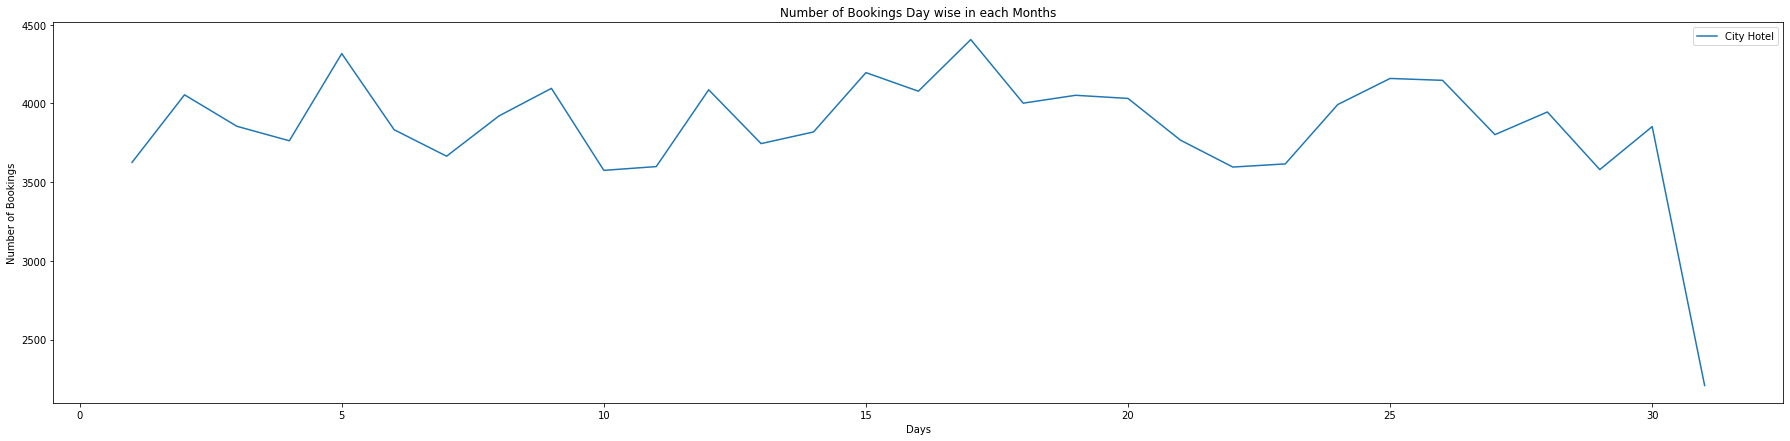

In [ ]:
# x_axis values 
city_x_axis_data = booking_by_month.index
# resort_x_axis_data = Resort_hotel_booking_by_month.index
# y_axis values(here we calculate % of bookings of city & resort hotel in each month )
city_y_axis_data = booking_by_month
# resort_y_axis_data =(Resort_hotel_booking_by_month/Resort_hotel_booking_by_month.sum())*100
plt.figure(figsize=(31,7))
plt.plot(city_x_axis_data,city_y_axis_data, label = 'City Hotel')
# plt.plot(resort_x_axis_data,resort_y_axis_data,label = 'Resort Hotel')
plt.xlabel('Days')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings Day wise in each Months')
plt.legend()
plt.show()

In [ ]:
# Create list of months 
day_index = []
for i in range(1,32):
  day_index.append(i)

# arranging hotel bookings according to month index
Daily_Adr = hotel['adr'].value_counts().reindex(day_index)
Daily_Adr

1      21
2      13
3       5
4      24
5       4
6      72
7       4
8     104
9      13
10      9
11      2
12     93
13      3
14      6
15      6
16      2
17     12
18      9
19     11
20      6
21      8
22     21
23     12
24     15
25    175
26    158
27    103
28     36
29    256
30    448
31     83
Name: adr, dtype: int64

In [ ]:
import plotly.express as px

#df = px.data.gapminder().query("country=='Canada'")
fig = px.line(hotel, x="arrival_date_day_of_month", y="adr", title='Average ADR Daywise')
fig.show()

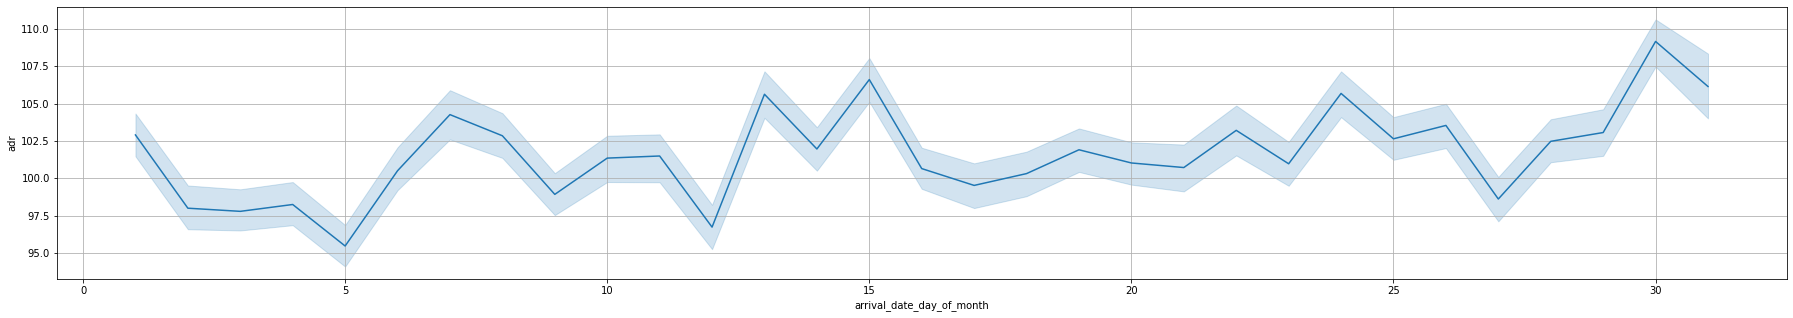

In [ ]:
# Visualisation.
line = plt.subplots(figsize=(31,5)) 
sns.lineplot(x='arrival_date_day_of_month',y='adr',data=hotel)
ax.set_title('AVERAGE ADR Daywise', fontsize=20)
ax.set_xlabel ('MONTH',fontsize=15)
ax.set_ylabel ('ADR',fontsize=15)
plt.grid(True)
plt.show()

In [ ]:
Busiest_day = hotel['arrival_date_day_of_month'].value_counts().reset_index()
Busiest_day.columns=['Day','values']

In [ ]:
Busiest_day

,Day,values
0,17,4406
1,5,4317
2,15,4196
3,25,4159
4,26,4147
5,9,4096
6,12,4087
7,16,4078
8,2,4055
9,19,4052


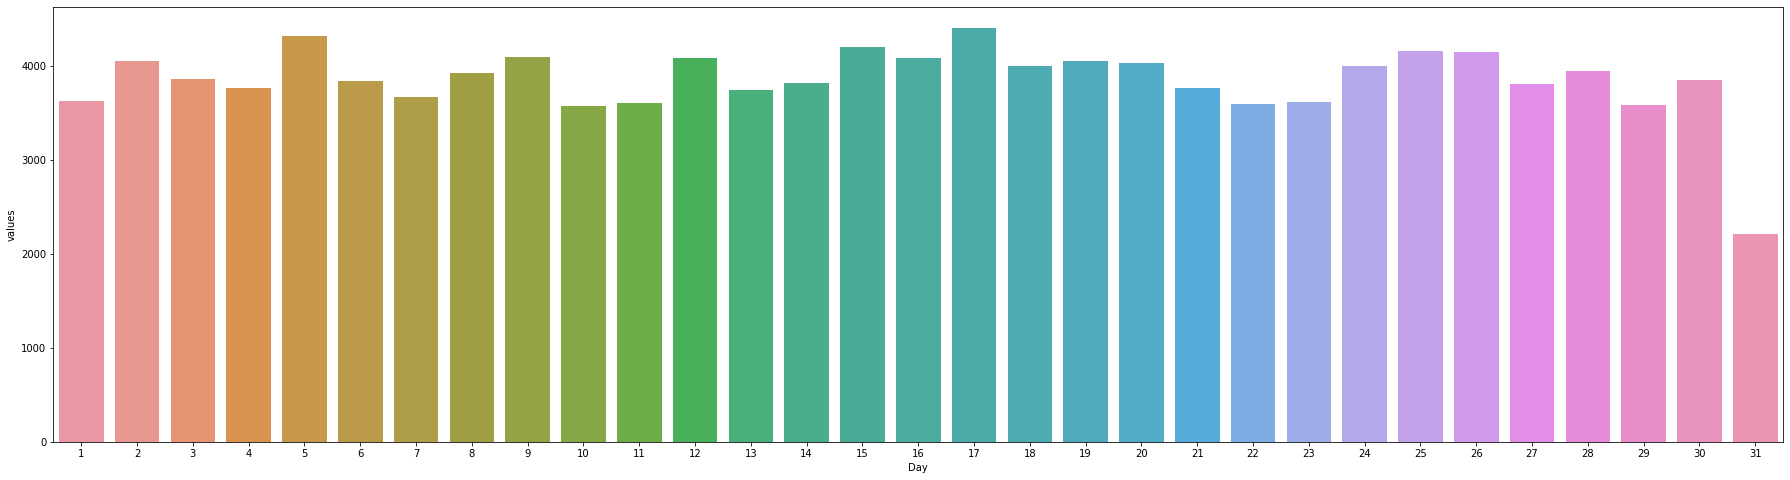

In [ ]:
plt.figure(figsize=(31,8))
sns.barplot(x=Busiest_day['Day'],y=Busiest_day['values'])

plt.show()

In [ ]:
import plotly.express as px
#df = px.data.medals_long()

fig = px.bar(Busiest_day, y="values", x="Day")
#fig.update_traces(marker_size=10)
fig.show()

In [ ]:
new_df = hotel.groupby(['arrival_date_month','arrival_date_day_of_month'])

In [ ]:
new_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14238,Resort Hotel,0,3,2016,January,3,15,0,1,1,...,No Deposit,NaN,291.0,0,Transient,30,0,0,Check-Out,2016-01-16
14455,Resort Hotel,0,0,2016,February,10,29,1,3,1,...,No Deposit,NaN,47.0,0,Transient,30,0,0,Check-Out,2016-03-04
15053,Resort Hotel,0,0,2016,December,51,13,0,2,1,...,No Deposit,NaN,270.0,0,Transient,30,0,0,Check-Out,2016-12-15
15240,Resort Hotel,0,0,2017,January,2,10,0,3,1,...,No Deposit,NaN,47.0,0,Transient,35,0,0,Check-Out,2017-01-13


In [ ]:
adr_day= hotel.groupby(['arrival_date_day_of_month','arrival_date_month'])['adr'].mean()
adr_day.unstack()

arrival_date_month,April,August,December,February,January,July,June,March,May,November,October,September
arrival_date_day_of_month,,,,,,,,,,,,
1,99.775424,149.310757,69.220779,62.795349,85.250000,112.233820,114.376731,67.632959,114.084459,84.122677,94.845902,109.327645
2,97.464646,152.341246,70.957198,68.755000,84.856354,114.873995,116.265385,72.769697,96.702517,76.840909,98.237288,101.791391
3,95.084592,126.117296,75.400735,73.805825,76.483871,125.433908,111.072115,84.975510,106.098039,71.682274,84.219512,99.051051
4,90.809524,148.105398,77.128571,65.293436,67.843931,111.775463,106.117845,78.790000,103.558081,84.379085,90.891496,109.370370
5,87.043597,134.095652,71.140678,71.935484,68.848276,119.263333,116.843416,72.019048,102.033898,78.864964,103.415049,96.929412
6,98.190987,150.650919,72.677215,70.856269,75.031056,114.606127,113.720109,77.000000,109.833811,91.363229,83.822650,103.282869
7,97.660494,148.061441,76.267123,73.338164,70.287879,117.970660,121.312925,73.516245,107.238596,95.039832,96.816489,106.860902
8,98.167539,133.576577,83.348028,69.798742,66.360947,125.132394,128.450652,71.728972,101.978320,76.085106,80.552901,103.408228
9,94.434263,150.156695,75.481343,71.565611,60.969466,119.240741,116.760090,72.325779,101.110825,73.132911,86.481132,105.331754


In [ ]:
adr_1 = adr_day[1][1]
adr_1

IndexError: ignored

In [ ]:
adr_day= hotel.groupby(['arrival_date_day_of_month'])['adr'].mean()
adr_day

arrival_date_day_of_month
1     102.901820
2      97.990136
3      97.778988
4      98.238108
5      95.456104
6     100.500652
7     104.263574
8     102.845703
9      98.917236
10    101.347972
11    101.489580
12     96.721801
13    105.628304
14    101.959675
15    106.612250
16    100.645414
17     99.517703
18    100.309845
19    101.906466
20    101.021825
21    100.715158
22    103.208287
23    100.968197
24    105.683947
25    102.641741
26    103.538703
27     98.605997
28    102.472631
29    103.062291
30    109.168700
31    106.148098
Name: adr, dtype: float64

In [ ]:
list1 = []
for i in adr_day.arrival_date_day_of_month:
  for j in adr_day.arrival_date_month:
    x = x+j
  list1.append(x)

AttributeError: ignored

In [ ]:
(99.775424+149.310757+69.220779+62.795349+85.250000+112.233820+114.376731+67.632959+114.084459+84.122677+94.845902+109.327645)/12

96.91470850000002

In [ ]:
hotel[['arrival_date_month','arrival_date_day_of_month','adr']].corr()

,arrival_date_day_of_month,adr
arrival_date_day_of_month,1.000000,0.022636
adr,0.022636,1.000000


In [ ]:
import plotly.express as px
plt.figure(figsize=(31,12))

fig = px.scatter(hotel, x='arrival_date_month', y='arrival_date_day_of_month',z='adr',color='adr')
fig.show()

TypeError: ignored

<Figure size 2232x864 with 0 Axes>

In [ ]:
adr_day= pd.DataFrame(hotel.groupby(['arrival_date_day_of_month'])['adr'].mean())
adr_day.index.name='Day'
adr_day.columns=['Daily ADR']
adr_day

,Daily ADR
Day,
1,108.045174
2,102.086484
3,104.357218
4,102.716034
5,101.466067
6,105.536592
7,109.308584
8,107.041026
9,103.789387


In [ ]:
import plotly.express as px
fig = px.line(adr_day, x="Day", y="Daily ADR", title='Daily ADR')
fig.show()

In [ ]:
adr_day1= hotel.groupby(['arrival_date_day_of_month'])['adr'].mean()
# adr_day1.index.name='Day'
# adr_day1.column=['Daily ADR']
adr_day1

arrival_date_day_of_month
1     103.271517
2      98.215205
3      98.184588
4      98.536481
5      95.728875
6     101.048877
7     104.628767
8     103.104442
9      99.163597
10    101.725276
11    102.039509
12     97.027553
13    105.871987
14    102.347707
15    106.994990
16    101.015888
17     99.784910
18    100.586833
19    102.167391
20    101.362921
21    101.100325
22    103.517189
23    101.288602
24    106.149445
25    104.240089
26    103.888841
27     99.030607
28    102.794125
29    103.289777
30    109.625895
31    106.443439
Name: adr, dtype: float64

In [ ]:
# x_axis values 
city_x_axis_data = booking_by_month.index
# resort_x_axis_data = Resort_hotel_booking_by_month.index
# y_axis values(here we calculate % of bookings of city & resort hotel in each month )
city_y_axis_data = booking_by_month
# resort_y_axis_data =(Resort_hotel_booking_by_month/Resort_hotel_booking_by_month.sum())*100
plt.figure(figsize=(31,7))
plt.plot(city_x_axis_data,city_y_axis_data, label = 'City Hotel')
# plt.plot(resort_x_axis_data,resort_y_axis_data,label = 'Resort Hotel')
plt.xlabel('Days')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings Day wise in each Months')
plt.legend()
plt.show()

In [ ]:
x = hotel.groupby('arrival_date_day_of_month')['adr'].mean()

In [ ]:
x

,arrival_date_day_of_month,adr
0,1,103.132096
1,2,98.190984
2,3,97.980833
3,4,98.460050
4,5,95.630030
5,6,100.679797
6,7,104.474851
7,8,103.051852
8,9,99.107542
9,10,101.554548
